# Basic Libraries

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

ibmqfactory.load_account:WARNING:2020-10-17 12:58:19,512: Credentials are already in use. The existing account in the session will be replaced.


# Important Functions

In [3]:
# Gate Insertion Functions
from GateInsertion_funcs import splitter, PiReader, u3PairAdder, cXPairAdder, GateInsertion, scalingCircuits #<---- main func

#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier

# Expectation Value/Running Functions
from Result_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, evaluator, scaleEvaluator #<---- main function

#Extrapolation Functions
from Extrapolation_funcs import RichardsonExtrap_Fraction, MonteCarloError, plottingCalc


# Setting up Variational form

In [4]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Arguments

In [5]:


Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]



In [6]:
scales = [1, 1.1, 1.2, 1.3]

In [7]:
import math
from qiskit import ClassicalRegister

def Hammifier(circy, Hamiltonian):
    """
    Adding local hamiltonians and returning one for meas II, IZ . ZI. ZZ and other for XX
    """
    circuits = []
    for line in iter(Hamiltonian.splitlines()):
        circ = circy.copy()
        #print(line)
        for index in range(len(line)):
            op = line[index]

            ##do nothing if Z or I
            if(op == "X"): 
                #hadamard in u3
                #print(index)
                circ.u3(math.pi/2, 0, math.pi, index)
            elif(op == "Y"):
                circ.rx(pi/2, index)
        c = ClassicalRegister(2)
        circ.add_register(c)
        circ.measure([0], [0])
        circ.measure([1],[1])
        circuits.append(circ)
    return [circuits[0], circuits[4]]

In [8]:
b = 0
def CircuitExtrapolator(param):
    '''
    Input: param (1D array) for circuit whose zero noise extrapolated energy to be calculated + some obvious param
    Output: Zero error energy + std_dev
    '''
    global b 
    b+=1
    print("---------------------------------------------------------------------------------")
    print(str(b) + "th evaluation where params are")
    print(param)
    scales = [1, 1.1]
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    noise_model = machine_noise_model
    copies =5
    
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    scaled_circuits = scalingCircuits(circuits, scales, copies)
    means, std = scaleEvaluator(scaled_circuits, 1000, simulator, machine_noise_model, Hamiltonian, Hamiltonian_weights)
    zero_energy, error = plottingCalc(means, std, scales)
    print(" and computed energy is: " + str(zero_energy))
    
    return zero_energy

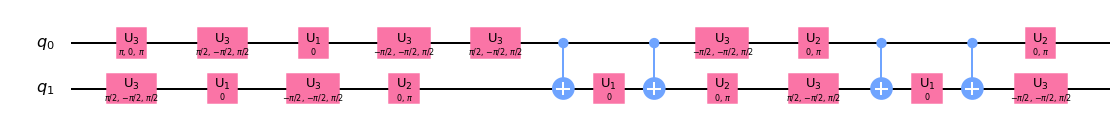

In [9]:
var_form.construct_circuit([0,0,0]).decompose().draw(output = 'mpl')

# Optimization

In [ ]:
from qiskit.aqua.components.optimizers import SPSA

optimizer = SPSA(maxiter=2000)
optimizer.optimize(num_vars = 3, objective_function= CircuitExtrapolator, gradient_function=None, variable_bounds=None, initial_point=[0,0,0])

---------------------------------------------------------------------------------
1th evaluation where params are
[-0.1  0.1 -0.1]
Scale ----------
Scale ----------
 and computed energy is: -1.0963236609189215
---------------------------------------------------------------------------------
2th evaluation where params are
[ 0.1 -0.1  0.1]
Scale ----------
Scale ----------
 and computed energy is: -1.0724128609189174
---------------------------------------------------------------------------------
3th evaluation where params are
[-0.1 -0.1 -0.1]
Scale ----------
Scale ----------
 and computed energy is: -1.1460148609189227
---------------------------------------------------------------------------------
4th evaluation where params are
[0.1 0.1 0.1]
Scale ----------
Scale ----------
 and computed energy is: -0.8884952609189201
---------------------------------------------------------------------------------
5th evaluation where params are
[ 0.1  0.1 -0.1]
Scale ----------
Scale ---------

Scale ----------
Scale ----------
 and computed energy is: -1.0414948609189192
---------------------------------------------------------------------------------
41th evaluation where params are
[0.1 0.1 0.1]
Scale ----------
Scale ----------
 and computed energy is: -0.9705208609189209
---------------------------------------------------------------------------------
42th evaluation where params are
[-0.1 -0.1 -0.1]
Scale ----------
Scale ----------
 and computed energy is: -1.158461660918919
---------------------------------------------------------------------------------
43th evaluation where params are
[ 0.1 -0.1 -0.1]
Scale ----------
Scale ----------
 and computed energy is: -0.9527316609189186
---------------------------------------------------------------------------------
44th evaluation where params are
[-0.1  0.1  0.1]
Scale ----------
Scale ----------
 and computed energy is: -1.0704848609189188
---------------------------------------------------------------------------------

Scale ----------
Scale ----------
 and computed energy is: -1.0816292609189166
---------------------------------------------------------------------------------
78th evaluation where params are
[-1.168314   -0.802924   -0.93512782]
Scale ----------
Scale ----------
 and computed energy is: -0.6396620609189204
---------------------------------------------------------------------------------
79th evaluation where params are
[-0.5305144 -1.4407236 -1.7250679]
Scale ----------
Scale ----------
 and computed energy is: -0.40028926091891864
---------------------------------------------------------------------------------
80th evaluation where params are
[-0.37837393 -1.59286408 -1.57292742]
Scale ----------
Scale ----------
 and computed energy is: -0.37986646091892007
---------------------------------------------------------------------------------
81th evaluation where params are
[-0.5584671  -1.56392289 -1.75302059]
Scale ----------
Scale ----------
 and computed energy is: -0.54286686091

Scale ----------
Scale ----------
 and computed energy is: -1.0000740609189178
---------------------------------------------------------------------------------
114th evaluation where params are
[-1.34570313 -1.22163336 -1.43196421]
Scale ----------
Scale ----------
 and computed energy is: -1.0629784609189212
---------------------------------------------------------------------------------
115th evaluation where params are
[-1.40542808 -1.30240316 -1.49168915]
Scale ----------
Scale ----------
 and computed energy is: -1.0311188609189197
---------------------------------------------------------------------------------
116th evaluation where params are
[-1.26493333 -1.16190842 -1.3511944 ]
Scale ----------
Scale ----------
 and computed energy is: -1.0317168609189187
---------------------------------------------------------------------------------
117th evaluation where params are
[-1.40465545 -1.30163054 -1.49091653]
Scale ----------
Scale ----------
 and computed energy is: -1.085761

Scale ----------
Scale ----------
 and computed energy is: -0.9760228609189205
---------------------------------------------------------------------------------
150th evaluation where params are
[-1.45250575 -1.50621493 -1.63519746]
Scale ----------
Scale ----------
 and computed energy is: -1.282425660918917
---------------------------------------------------------------------------------
151th evaluation where params are
[-1.68585173 -1.27286895 -1.86854344]
Scale ----------
Scale ----------
 and computed energy is: -0.8022776609189182
---------------------------------------------------------------------------------
152th evaluation where params are
[-1.55140031 -1.40732037 -1.73409201]
Scale ----------
Scale ----------
 and computed energy is: -1.0861696609189209
---------------------------------------------------------------------------------
153th evaluation where params are
[-1.3373404  -1.62138028 -1.5200321 ]
Scale ----------
Scale ----------
 and computed energy is: -0.8377008

Scale ----------
Scale ----------
 and computed energy is: -1.254277260918914
---------------------------------------------------------------------------------
186th evaluation where params are
[-1.49433489 -1.42872291 -1.56830764]
Scale ----------
Scale ----------
 and computed energy is: -1.1618600609189191
---------------------------------------------------------------------------------
187th evaluation where params are
[-1.43387053 -1.36825855 -1.628772  ]
Scale ----------
Scale ----------
 and computed energy is: -1.074316060918921
---------------------------------------------------------------------------------
188th evaluation where params are
[-1.30346193 -1.23784995 -1.7591806 ]
Scale ----------
Scale ----------
 and computed energy is: -0.9655200609189171
---------------------------------------------------------------------------------
189th evaluation where params are
[-1.50432495 -1.43871296 -1.55831758]
Scale ----------
Scale ----------
 and computed energy is: -1.23597486

Scale ----------
Scale ----------
 and computed energy is: -1.1389664609189232
---------------------------------------------------------------------------------
222th evaluation where params are
[-1.56857177 -1.33367628 -1.53284795]
Scale ----------
Scale ----------
 and computed energy is: -1.0684540609189166
---------------------------------------------------------------------------------
223th evaluation where params are
[-1.73698428 -1.37469785 -1.57386952]
Scale ----------
Scale ----------
 and computed energy is: -1.1308276609189212
---------------------------------------------------------------------------------
224th evaluation where params are
[-1.60959334 -1.50208879 -1.70126046]
Scale ----------
Scale ----------
 and computed energy is: -1.0004928609189188
---------------------------------------------------------------------------------
225th evaluation where params are
[-1.81216024 -1.2995219  -1.49869357]
Scale ----------
Scale ----------
 and computed energy is: -1.060681

Scale ----------
Scale ----------
 and computed energy is: -1.1775076609189161
---------------------------------------------------------------------------------
258th evaluation where params are
[-1.83457914 -1.24156359 -1.8005839 ]
Scale ----------
Scale ----------
 and computed energy is: -0.9434324609189196
---------------------------------------------------------------------------------
259th evaluation where params are
[-1.58594009 -1.36520843 -1.67693906]
Scale ----------
Scale ----------
 and computed energy is: -0.9505764609189199
---------------------------------------------------------------------------------
260th evaluation where params are
[-1.7109343  -1.49020264 -1.55194485]
Scale ----------
Scale ----------
 and computed energy is: -1.0218024609189202
---------------------------------------------------------------------------------
261th evaluation where params are
[-1.62342514 -1.40269348 -1.51457941]
Scale ----------
Scale ----------
 and computed energy is: -0.937550

Scale ----------
Scale ----------
 and computed energy is: -0.7251300609189194
---------------------------------------------------------------------------------
294th evaluation where params are
[-1.95245894 -1.05884181 -1.23709695]
Scale ----------
Scale ----------
 and computed energy is: -0.5207204609189194
---------------------------------------------------------------------------------
295th evaluation where params are
[-2.05213666 -1.15851953 -1.33677467]
Scale ----------
Scale ----------
 and computed energy is: -0.7979816609189206
---------------------------------------------------------------------------------
296th evaluation where params are
[-2.17514925 -1.28153212 -1.45978727]
Scale ----------
Scale ----------
 and computed energy is: -0.9903460609189148
---------------------------------------------------------------------------------
297th evaluation where params are
[-2.14556057 -1.25194344 -1.43019858]
Scale ----------
Scale ----------
 and computed energy is: -0.943708

Scale ----------
Scale ----------
 and computed energy is: -0.7438516609189197
---------------------------------------------------------------------------------
330th evaluation where params are
[-2.17940136 -0.75008425 -1.71860979]
Scale ----------
Scale ----------
 and computed energy is: -0.5768280609189196
---------------------------------------------------------------------------------
331th evaluation where params are
[-1.98204853 -0.94743709 -1.52125695]
Scale ----------
Scale ----------
 and computed energy is: -0.824570060918919
---------------------------------------------------------------------------------
332th evaluation where params are
[-2.10337592 -0.8261097  -1.64258435]
Scale ----------
Scale ----------
 and computed energy is: -0.7631176609189181
---------------------------------------------------------------------------------
333th evaluation where params are
[-2.07547642 -0.85400919 -1.49344403]
Scale ----------
Scale ----------
 and computed energy is: -0.6011452

Scale ----------
Scale ----------
 and computed energy is: -0.9824872609189164
---------------------------------------------------------------------------------
366th evaluation where params are
[-1.93587409 -1.12259963 -1.80664143]
Scale ----------
Scale ----------
 and computed energy is: -1.0207744609189195
---------------------------------------------------------------------------------
367th evaluation where params are
[-2.03938295 -1.22610849 -1.8229966 ]
Scale ----------
Scale ----------
 and computed energy is: -0.6215028609189194
---------------------------------------------------------------------------------
368th evaluation where params are
[-1.91951892 -1.10624446 -1.70313257]
Scale ----------
Scale ----------
 and computed energy is: -1.1758164609189186
---------------------------------------------------------------------------------
369th evaluation where params are
[-1.80275437 -0.86969175 -1.58636802]
Scale ----------
Scale ----------
 and computed energy is: -0.950609

Scale ----------
Scale ----------
 and computed energy is: -1.301118460918923
---------------------------------------------------------------------------------
402th evaluation where params are
[-1.52229708 -1.3543797  -1.62678972]
Scale ----------
Scale ----------
 and computed energy is: -1.1589180609189185
---------------------------------------------------------------------------------
403th evaluation where params are
[-1.69858579 -1.53066842 -1.80307844]
Scale ----------
Scale ----------
 and computed energy is: -0.9268616609189193
---------------------------------------------------------------------------------
404th evaluation where params are
[-1.5800131  -1.41209572 -1.68450574]
Scale ----------
Scale ----------
 and computed energy is: -1.4025944609189152
---------------------------------------------------------------------------------
405th evaluation where params are
[-1.38761784 -1.33820571 -1.61061573]
Scale ----------
Scale ----------
 and computed energy is: -0.9866600